<a href="https://colab.research.google.com/github/JobinJose9660/sales-predictions/blob/main/Copy_of_machine_learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
filename  = '//content/sales_predictions(5).csv'
sales  = pd.read_csv(filename)

In [3]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking Inconsistencies, Spelling errors

In [4]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [5]:
sales.loc[sales['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

sales.loc[sales['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

sales.loc[sales['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

sales.loc[sales['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

sales.loc[sales['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

sales.loc[sales['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

Analysing how features are related to Outletsales

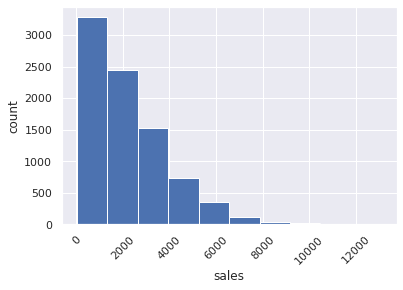

In [123]:
sales['Item_Outlet_Sales'].hist()
plt.xticks(rotation = 45)
plt.xlabel('sales')
plt.ylabel('count')
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig('fig3.png', dpi = 300)

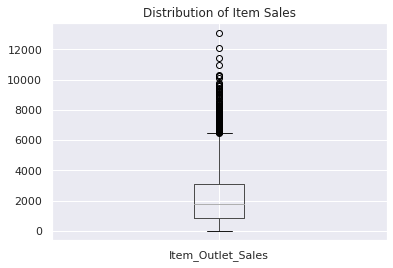

In [126]:
#Stastical summary of Item_Outlet_Sales
sales.boxplot(column ='Item_Outlet_Sales')
plt.title('Distribution of Item Sales')
plt.savefig('fig4.png', dpi = 300)
plt.show()

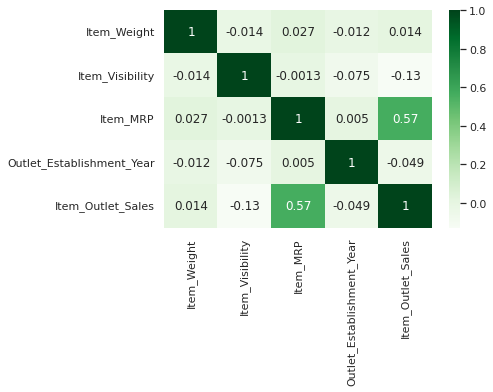

In [121]:
 corr = sales.corr()
 sns.heatmap(corr,cmap='Greens',annot=True)
 plt.savefig('fig2.png', dpi = 300)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

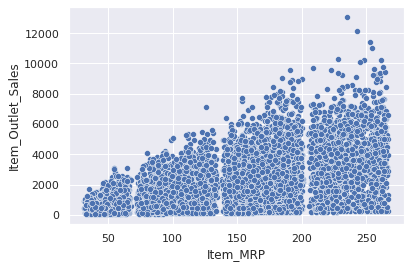

<Figure size 720x576 with 0 Axes>

In [128]:
sns.scatterplot(x='Item_MRP', y = 'Item_Outlet_Sales', data = sales)
plt.figure(figsize=(10,8))
plt.savefig('fig5.png', dpi = 300)
plt.show()

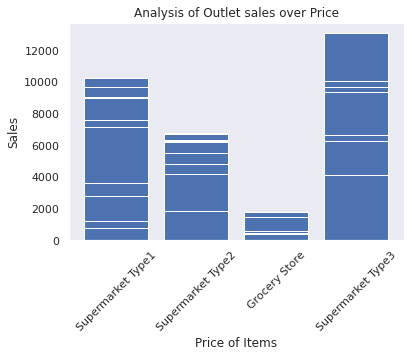

In [138]:
plt.bar(sales['Outlet_Type'], sales['Item_Outlet_Sales'])
plt.xlabel('Price of Items')
plt.ylabel('Sales')
plt.title('Analysis of Outlet sales over Price')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Splitting the Data

In [6]:
X= sales.drop(columns='Item_Outlet_Sales')
y = sales['Item_Outlet_Sales']
X_train, X_test ,y_train,y_test = train_test_split(X,y,random_state = 42)

Preprocessing the data

In [7]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
#Filling the missing values

In [8]:
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputer.fit(X_train[['Item_Weight']])
X_train['Item_Weight'] = numeric_imputer.transform(X_train[['Item_Weight']])
X_test['Item_Weight'] = numeric_imputer.transform(X_test[['Item_Weight']])


categorical_imputer.fit(X_train[['Outlet_Size']])
X_train['Outlet_Size'] = categorical_imputer.transform(X_train[['Outlet_Size']])
X_test['Outlet_Size'] = categorical_imputer.transform(X_test[['Outlet_Size']])

In [9]:
X_train.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [10]:
sizes = {'Small':0,'Medium':1,'High':2}
X_train['Outlet_Size'] = X_train['Outlet_Size'].replace(sizes)

In [11]:
X_train['Outlet_Size'].value_counts()

1    3915
0    1788
2     689
Name: Outlet_Size, dtype: int64

In [12]:
X_train['Outlet_Size'] = X_train['Outlet_Size'].astype('object')
X_test['Outlet_Size'] =X_test['Outlet_Size'].astype('object')

In [13]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
scalaer = StandardScaler()

In [14]:
ohe_tuple = (encoder,cat_selector)
scalar_tuple =(scalaer,num_selector)
column_transform = make_column_transformer(ohe_tuple,scalar_tuple,remainder = 'passthrough')

Let's analyse how feature columns are related to outlet sales

Evaluating the data using Linear regression model

In [15]:
lin_reg = LinearRegression()
pipe = make_pipeline(column_transform,lin_reg)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f48f688cc90>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f48f688cc50>)])),
                ('linearregression', LinearRegression())])

In [39]:
#Creating a function to get the scores of r2 and rmse and other evaluation metrics
def model(y_true, y_pred):

  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)

  print(f'scores: MAE: {mae}, \nMSE: {mse}, \nRMSE: {rmse}, \
  \nR2: {r2}')

Model evalution

In [40]:
print('Train Scores')
model(y_train,pipe.predict(X_train))
print('Testing Scores')
model(y_test, pipe.predict(X_test))

Train Scores
scores: MAE: 739.5459094493116, 
MSE: 975956.8800610695, 
RMSE: 987.9052991360404,   
R2: 0.6702241974534979
Testing Scores
scores: MAE: 4399928590710320.0, 
MSE: 3.186132127612579e+31, 
RMSE: 5644583357177551.0,   
R2: -1.1548236158716282e+25


Here we can see that there is huge difference between R2 scores of test and train score data, so we can say that the model has High Bias and Variance 

Let's analyse the model using baseline model

In [64]:

dummy = DummyRegressor(strategy='mean')
dummy_pipe = make_pipeline(column_transform, dummy)
dummy_pipe.fit(X_train, y_train)
print('Training Scores')
model(y_train, dummy_pipe.predict(X_train))

print('\n')

print('Testing Scores')
model(y_test, dummy_pipe.predict(X_test))

Training Scores
scores: MAE: 1360.2184410159132, 
MSE: 2959455.7045265585, 
RMSE: 1720.306863477141,   
R2: 0.0


Testing Scores
scores: MAE: 1326.121044678208, 
MSE: 2772144.4627103633, 
RMSE: 1664.9758144520788,   
R2: -0.004772483978719766


I'm going to regularize the model usinf Knnregressor and will tune the model

In [20]:
bias_knn = KNeighborsRegressor(n_neighbors=1)

bias_knn_pipe = make_pipeline(column_transform, bias_knn)

bias_knn_pipe.fit(X_train, y_train)

print('Training Scores')
model(y_train, bias_knn_pipe.predict(X_train))

print('\n')

print('Testing Scores')
model(y_test, bias_knn_pipe.predict(X_test))

Training Scores
scores: MAE: 0.0, 
MSE: 0.0, 
RMSE: 0.0,   
R2: 1.0


Testing Scores
scores: MAE: 1036.1685120600657, 
MSE: 2173390.2412146926, 
RMSE: 1474.2422600151892,   
R2: 0.2122478677805626


Finding the best value for n_neighbors

In [65]:
ks = range(1, 20)
scores = pd.DataFrame(columns=['Train', 'Test'], index=ks)
for k in ks:

  knn = KNeighborsRegressor(n_neighbors=k)
  knn_pipe = make_pipeline(column_transform, knn)
  knn_pipe.fit(X_train, y_train)

  train_pred = knn_pipe.predict(X_train)
  test_pred = knn_pipe.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred)) 
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
  
  scores.loc[k, 'Train'] = train_rmse
  scores.loc[k, 'Test'] = test_rmse

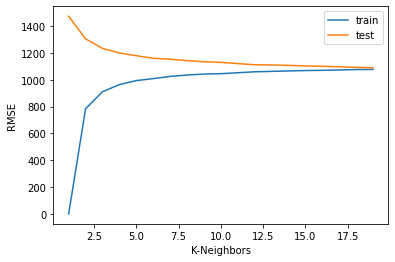

In [22]:
plt.plot(ks, scores['Train'], label='train')
plt.plot(ks, scores['Test'], label='test')
plt.ylabel('RMSE')
plt.xlabel('K-Neighbors')
plt.legend()
plt.show()

In [23]:
best_k = scores.sort_values(by='Test').index[0]
best_k

19

In [66]:
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn_pipe = make_pipeline(column_transform, best_knn)
best_knn_pipe.fit(X_train, y_train)

#evaluate the final model
print(f'Training Scores')
model(y_train, best_knn_pipe.predict(X_train))

print('\n')

print(f'Testing Scores')
model(y_test, best_knn_pipe.predict(X_test))

print('\n')

Training Scores
scores: MAE: 771.9520539094922, 
MSE: 1161051.0387542255, 
RMSE: 1077.5207834442106,   
R2: 0.6076808863946266


Testing Scores
scores: MAE: 767.5310794684976, 
MSE: 1189002.6418443376, 
RMSE: 1090.4139772785095,   
R2: 0.5690422508734834




We can see R2 test score has become closer after tuning the data but still there is difference so we can say that still there is 

Plotting the values of Test scores 

Text(5.5, 0.5, 'prediction')

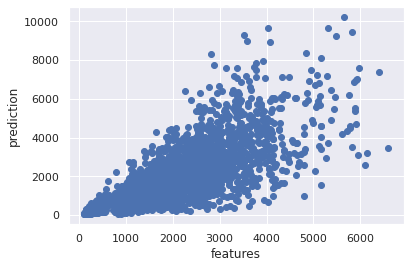

In [137]:
pipe6 = best_knn_pipe.predict(X_test)
plt.scatter(pipe6,y_test)
plt.savefig('fig7.png', dpi = 300)
plt.xlabel('features')
plt.ylabel('prediction')

Let's evalute the model using Simpleregression Tree model

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree_model = DecisionTreeRegressor(random_state=42)

In [27]:
column_transform.fit(X_train)

X_train_processed = column_transform.transform(X_train)
X_test_processed = column_transform.transform(X_test)



In [28]:
tree_model.fit(X_train_processed,y_train)


DecisionTreeRegressor(random_state=42)

In [29]:
train_preds = tree_model.predict(X_train_processed)
test_preds = tree_model.predict(X_test_processed)


In [30]:
# evaluate the model
train_score = tree_model.score(X_train_processed, y_train)
test_score = tree_model.score(X_test_processed, y_test)
print(train_score)
print(test_score)
print(f'Training Scores')
model(y_train, tree_model.predict(X_train_processed))

print('\n')

print(f'Testing Scores')
model(y_test, tree_model.predict(X_test_processed))

print('\n')



1.0
0.24056019223457958
Training Scores
scores: MAE: 1.2005415435245748e-16, 
MSE: 2.4643264323299693e-29, 
RMSE: 4.96419825584149e-15,   
R2: 1.0


Testing Scores
scores: MAE: 984.5860397935243, 
MSE: 2095277.1810810468, 
RMSE: 1447.5072300617524,   
R2: 0.24056019223457958




When we analysing the metrics in DecisionTreeRegressor we can see there see Highvariance(overfit) of the model, so let's tune the model

In [32]:
tree_model.get_depth()

60

In [67]:

max_depth_range = list(range(2, 60))

r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)


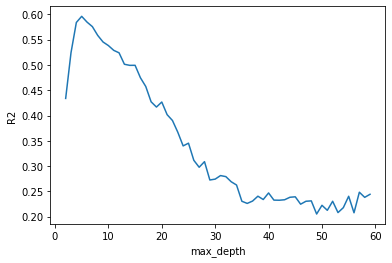

In [34]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');


Let's run max_depth as 5

In [78]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [79]:
print(f'Training Scores')
model(y_train, dec_tree_5.predict(X_train_processed))

print('\n')

print(f'Testing Scores')
model(y_test, dec_tree_5.predict(X_test_processed))

print('\n')

Training Scores
scores: MAE: 761.9784955008363, 
MSE: 1171332.784431318, 
RMSE: 1082.281287111312,   
R2: 0.6042066848171654


Testing Scores
scores: MAE: 736.8796499354125, 
MSE: 1114471.1152767404, 
RMSE: 1055.6851402178304,   
R2: 0.5960564372160062




We can see that test and train score become closer so these model is compartively good fit than linear regression and Knnregressor 

pipe1 = pipe

Text(5.5, 0.5, 'prediction')

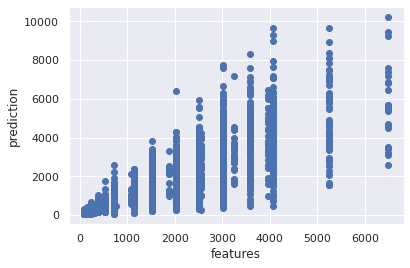

In [136]:
pipe5 = dec_tree_5.predict(X_test_processed)
plt.scatter(pipe5,y_test)
plt.savefig('fig7.png', dpi = 300)
plt.xlabel('features')
plt.ylabel('prediction')